In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
ticker = 'AAPL'  
#Import Apple stock data for this time period.
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.shape

(1006, 6)

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960480,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484360,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [5]:
data = data.dropna()#drop empty values

In [7]:
data['Returns'] = data['Adj Close'].pct_change()  #Caluclate returns for each day

In [8]:
mean_return = data['Returns'].mean()
std_return = data['Returns'].std()

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960480,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251152,146322800,-0.009722
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200,0.007968
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484360,108872000,-0.004703
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200,0.016086
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,-0.002841
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.000518


In [10]:
simulation_df = pd.DataFrame()

In [52]:
num_simulations = 1000
num_days = 252  # Let the dates for which stock prices to be predicted


last_price = data['Adj Close'].iloc[-1]

In [53]:
last_price

192.02418518066406

In [54]:
last_date = data.index[-1]
simulation_dates = pd.date_range(last_date, periods=num_days+1, freq='B')  # Business days

# Initialize a DataFrame to store the simulation results for future dates
simulation_df = pd.DataFrame(index=simulation_dates)

In [55]:
simulation_df

""
2023-12-29
2024-01-01
2024-01-02
2024-01-03
2024-01-04
...
2024-12-11
2024-12-12
2024-12-13
2024-12-16


In [56]:
#calculation for future prices for each day 1000 times and store it in table
for x in range(num_simulations):
    price_series = [last_price]
    for _ in range(num_days):
        # Apply the geometric Brownian motion formula with randomness
        next_price = price_series[-1] * np.exp((mean_return - (std_return ** 2) / 2) + std_return * np.random.normal())
        price_series.append(next_price)
    simulation_df[x] = price_series

C:\Users\kunal\AppData\Local\Temp\ipykernel_27204\1937880391.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series


In [57]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-12-29,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,...,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185,192.024185
2024-01-01,196.223110,193.867643,195.114963,193.431566,191.084032,195.734715,193.903811,187.910772,199.518752,191.471014,...,194.407308,191.136441,187.397840,195.457526,194.171638,193.308555,191.845901,193.381372,193.892103,188.795823
2024-01-02,191.995622,195.795639,196.278573,193.935249,202.710066,191.111647,195.107159,192.185159,200.271240,191.570993,...,191.285345,192.939872,183.321876,199.332714,194.762136,185.793399,195.300728,187.967859,203.124368,192.533472
2024-01-03,188.830735,201.279599,193.284363,197.656529,205.865832,192.971751,187.309436,186.565662,202.477264,189.378743,...,193.201716,196.574941,185.096765,200.757846,195.979064,181.461916,192.057336,192.040689,194.742610,196.809892
2024-01-04,180.792490,201.878383,190.240714,195.179730,210.630751,193.469079,190.514672,189.141082,205.012601,191.150231,...,187.074072,195.666645,178.741247,199.884045,194.784437,180.600438,187.741237,194.157180,196.403992,197.802727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11,201.556165,556.118900,227.709388,257.239543,301.120214,387.747842,286.411261,258.677445,243.228347,232.610321,...,103.397071,185.758967,218.709063,214.981819,276.187567,135.955361,193.860208,173.104302,431.862637,400.506066
2024-12-12,202.171949,546.438420,237.687275,259.357676,307.696976,372.040199,284.558222,253.555206,247.126147,235.954899,...,100.976053,191.477014,222.832401,221.747619,273.285093,135.477379,199.734027,177.367094,450.981940,385.540685
2024-12-13,205.402675,554.774511,235.995658,270.331423,307.823283,364.822240,284.197759,255.258712,248.457913,243.303061,...,99.534784,189.022013,225.912084,223.744563,271.550148,131.946372,198.658535,180.092689,441.176824,378.182342
2024-12-16,205.927740,547.372328,241.504189,266.377956,325.948767,371.990006,285.299077,250.425567,251.432224,248.032705,...,101.568503,187.344486,220.763673,229.681578,259.391275,131.880081,197.647593,183.215729,425.387936,374.081647


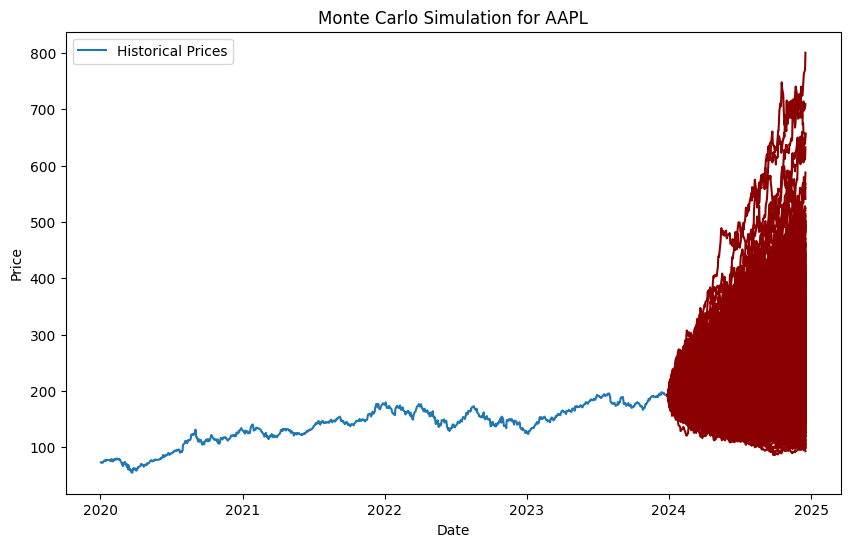

In [58]:
plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(data['Adj Close'], label='Historical Prices')

# Plot Monte Carlo simulations
for x in simulation_df.columns:
    plt.plot(simulation_df.index, simulation_df[x], color='darkred')

# Customize plot
plt.title(f'Monte Carlo Simulation for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Historical Prices'])
plt.show()

In Above Plot,I considered number of simulation =1000 and plotted the predicted stock prices for 252 days after 2023-12-29